# Assignment 2. Text Preprocessing

In [1]:
# Import necessary libraries
import re
import pandas as pd

## 1. Convert data to Dataframe and lowercase all text

In [2]:
__dataset__ = [
    "This is introduction to NLP",
    "It is likely to be useful,to people ",
    "Machine learning is the new electricity",
    "There would be less hype around AI and more action going forward",
    "python is the best tool!",
    "R is good language",
    "I like this book",
    "I want more books like this"
]

df = pd.DataFrame(__dataset__, columns=["tweet"])

# Convert all text to lowercase
def lowercase_text(text: str) -> str:
    return text.lower()

df["tweet_lower"] = df["tweet"].apply(lowercase_text)
df

,tweet,tweet_lower
0,This is introduction to NLP,this is introduction to nlp
1,"It is likely to be useful,to people","it is likely to be useful,to people"
2,Machine learning is the new electricity,machine learning is the new electricity
3,There would be less hype around AI and more ac...,there would be less hype around ai and more ac...
4,python is the best tool!,python is the best tool!
5,R is good language,r is good language
6,I like this book,i like this book
7,I want more books like this,i want more books like this


## Remove Punctuation

In [3]:
__sentence1__ = "I. like. This book!"
__sentence2__ = "Covid-19 có thể kéo theo hàng loạt khủng hoảng kinh tế, lương thực, chính trị..., đảo ngược tiến độ phát triển của thế giới tới hàng chục năm"

# Clean sentences
cleaned_sentence1 = re.sub(pattern=r"[^\w\s]", repl="", string=__sentence1__)
cleaned_sentence2 = re.sub(pattern=r"[^\w\s]", repl="", string=__sentence2__)

print("Original Sentence 1:", __sentence1__)
print("Cleaned Sentence 1:", cleaned_sentence1)
print("Original Sentence 2:", __sentence2__)
print("Cleaned Sentence 2:", cleaned_sentence2)

Original Sentence 1: I. like. This book!
Cleaned Sentence 1: I like This book
Original Sentence 2: Covid-19 có thể kéo theo hàng loạt khủng hoảng kinh tế, lương thực, chính trị..., đảo ngược tiến độ phát triển của thế giới tới hàng chục năm
Cleaned Sentence 2: Covid19 có thể kéo theo hàng loạt khủng hoảng kinh tế lương thực chính trị đảo ngược tiến độ phát triển của thế giới tới hàng chục năm


In [4]:
# Apply cleaning to the dataframe
def remove_punctuation(text: str) -> str:
    return re.sub(pattern=r"[^\w\s]", repl="", string=text)

df["tweet_no_punct"] = df["tweet_lower"].apply(remove_punctuation)
df

,tweet,tweet_lower,tweet_no_punct
0,This is introduction to NLP,this is introduction to nlp,this is introduction to nlp
1,"It is likely to be useful,to people","it is likely to be useful,to people",it is likely to be usefulto people
2,Machine learning is the new electricity,machine learning is the new electricity,machine learning is the new electricity
3,There would be less hype around AI and more ac...,there would be less hype around ai and more ac...,there would be less hype around ai and more ac...
4,python is the best tool!,python is the best tool!,python is the best tool
5,R is good language,r is good language,r is good language
6,I like this book,i like this book,i like this book
7,I want more books like this,i want more books like this,i want more books like this


## Remove Stopwords

In [5]:
import nltk
from nltk.corpus import stopwords # Import stopwords from nltk

nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dnhtr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
def remove_stopwords(text: str) -> str:
    stop_words = set(stopwords.words("english"))
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return " ".join(filtered_words)

df["tweet_no_stopwords"] = df["tweet_no_punct"].apply(remove_stopwords)
df

,tweet,tweet_lower,tweet_no_punct,tweet_no_stopwords
0,This is introduction to NLP,this is introduction to nlp,this is introduction to nlp,introduction nlp
1,"It is likely to be useful,to people","it is likely to be useful,to people",it is likely to be usefulto people,likely usefulto people
2,Machine learning is the new electricity,machine learning is the new electricity,machine learning is the new electricity,machine learning new electricity
3,There would be less hype around AI and more ac...,there would be less hype around ai and more ac...,there would be less hype around ai and more ac...,would less hype around ai action going forward
4,python is the best tool!,python is the best tool!,python is the best tool,python best tool
5,R is good language,r is good language,r is good language,r good language
6,I like this book,i like this book,i like this book,like book
7,I want more books like this,i want more books like this,i want more books like this,want books like


## Standardizing Text

In [7]:
__lookup_dict__ = {
    "nlp": "natural language processing",
    "ur": "your",
    "wbu": "what about you",
}

def text_standardization(text: str, lookup_dict: dict) -> str:
    words = text.split()

    new_words = []
    new_text = ""

    for word in words:
        word = re.sub(pattern=r"[^\w\s]", repl="", string=word)
        if word.lower() in lookup_dict:
            word = lookup_dict[word.lower()]
            new_words.append(word)
            new_text = " ".join(new_words)

    return new_text

test1 = "I like nlp it's ur choice"
print("Before Standardization:", test1)
print("After Standardization:", text_standardization(test1, __lookup_dict__))

Before Standardization: I like nlp it's ur choice
After Standardization: natural language processing your


## Correcting Spelling

In [8]:
__text__ = [
    "Introductin to NLP",
    "It is likely to be useful, to people ",
    "Machine learning is the new electricity",
    "R is good language",
    "I like this book",
    "I want more books like this"
]
df2 = pd.DataFrame(__text__, columns=["tweet"])
df2

,tweet
0,Introductin to NLP
1,"It is likely to be useful, to people"
2,Machine learning is the new electricity
3,R is good language
4,I like this book
5,I want more books like this


In [9]:
from textblob import TextBlob

def correct_spelling(text: str) -> str:
    """
    Corrects the spelling of the input text using TextBlob.
    Args:
        text (str): The input text to be corrected.
    Returns:
        str: The text with corrected spelling.
    """
    blob = TextBlob(text)
    corrected_text = str(blob.correct())
    return corrected_text

df2["tweet_corrected"] = df2["tweet"].apply(correct_spelling)
df2

,tweet,tweet_corrected
0,Introductin to NLP,Introduction to NLP
1,"It is likely to be useful, to people","It is likely to be useful, to people"
2,Machine learning is the new electricity,Machine learning is the new electricity
3,R is good language,R is good language
4,I like this book,I like this book
5,I want more books like this,I want more books like this


## Tokenization

In [10]:
__string__ = "There would be less hype around AI and more action going forward"
tokens = TextBlob(__string__).words
tokens

WordList(['There', 'would', 'be', 'less', 'hype', 'around', 'AI', 'and', 'more', 'action', 'going', 'forward'])

In [11]:
# Tokenization using NLTK

import nltk
nltk.word_tokenize(__string__)

['There',
 'would',
 'be',
 'less',
 'hype',
 'around',
 'AI',
 'and',
 'more',
 'action',
 'going',
 'forward']

In [12]:
__string__.split()

['There',
 'would',
 'be',
 'less',
 'hype',
 'around',
 'AI',
 'and',
 'more',
 'action',
 'going',
 'forward']

## Stemming

In [13]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

# Function to stem words in a sentence
def stem_sentence(text: str) -> str:
    words = text.split()
    stemmed_words = [ps.stem(word) for word in words]
    return " ".join(stemmed_words)

df2["tweet_stemmed"] = df2["tweet_corrected"].apply(stem_sentence)
df2

,tweet,tweet_corrected,tweet_stemmed
0,Introductin to NLP,Introduction to NLP,introduct to nlp
1,"It is likely to be useful, to people","It is likely to be useful, to people","it is like to be useful, to peopl"
2,Machine learning is the new electricity,Machine learning is the new electricity,machin learn is the new electr
3,R is good language,R is good language,r is good languag
4,I like this book,I like this book,i like thi book
5,I want more books like this,I want more books like this,i want more book like thi


## Lemmatization

In [14]:
from textblob import  Word
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dnhtr\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [15]:
def lemmatize_sentence(text: str) -> str:
    """
    Lemmatizes the words in the input text using TextBlob's Word class.
    Args:
        text (str): The input text to be lemmatized.
    Returns:
        str: The text with lemmatized words.
    """
    words = text.split()
    lemmatized_words = [Word(word).lemmatize() for word in words]
    return " ".join(lemmatized_words)

df2["tweet_lemmatized"] = df2["tweet_corrected"].apply(lemmatize_sentence)
df2

,tweet,tweet_corrected,tweet_stemmed,tweet_lemmatized
0,Introductin to NLP,Introduction to NLP,introduct to nlp,Introduction to NLP
1,"It is likely to be useful, to people","It is likely to be useful, to people","it is like to be useful, to peopl","It is likely to be useful, to people"
2,Machine learning is the new electricity,Machine learning is the new electricity,machin learn is the new electr,Machine learning is the new electricity
3,R is good language,R is good language,r is good languag,R is good language
4,I like this book,I like this book,i like thi book,I like this book
5,I want more books like this,I want more books like this,i want more book like thi,I want more book like this


## Exploratory Data Analysis (EDA)
> - Word Cloud
> - Frequency Distribution

In [20]:
nltk.download("webtext")
from nltk.corpus import webtext
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import string

[nltk_data] Downloading package webtext to
[nltk_data]     C:\Users\dnhtr\AppData\Roaming\nltk_data...
[nltk_data]   Package webtext is already up-to-date!


In [23]:
__wt_sentences__ = webtext.sents("firefox.txt")
__wt_words__ = webtext.words("firefox.txt")
print(__wt_words__[:100])

['Cookie', 'Manager', ':', '"', 'Don', "'", 't', 'allow', 'sites', 'that', 'set', 'removed', 'cookies', 'to', 'set', 'future', 'cookies', '"', 'should', 'stay', 'checked', 'When', 'in', 'full', 'screen', 'mode', 'Pressing', 'Ctrl', '-', 'N', 'should', 'open', 'a', 'new', 'browser', 'when', 'only', 'download', 'dialog', 'is', 'left', 'open', 'add', 'icons', 'to', 'context', 'menu', 'So', 'called', '"', 'tab', 'bar', '"', 'should', 'be', 'made', 'a', 'proper', 'toolbar', 'or', 'given', 'the', 'ability', 'collapse', '/', 'expand', '.', '[', 'XUL', ']', 'Implement', 'Cocoa', '-', 'style', 'toolbar', 'customization', '.', '#', 'ifdefs', 'for', 'MOZ_PHOENIX', 'customize', 'dialog', "'", 's', 'toolbar', 'has', 'small', 'icons', 'when', 'small', 'icons', 'is', 'not', 'checked', 'nightly', 'builds', 'and', 'tinderboxen', 'for']


<Axes: xlabel='Samples', ylabel='Counts'>

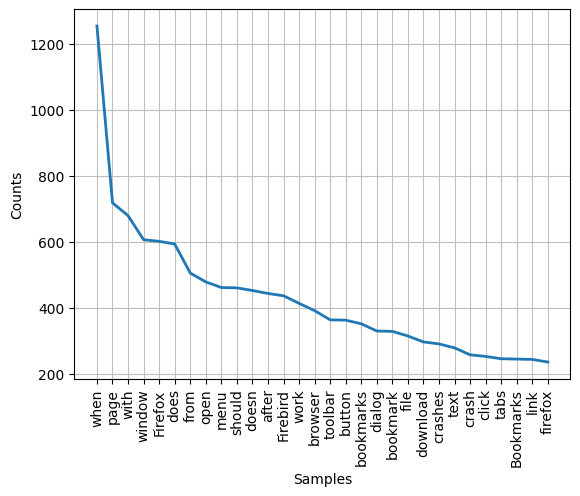

In [24]:
freq_dist = FreqDist(__wt_words__)
large_words = dict(
    [(word, count) for word, count in freq_dist.items() if len(word) > 3]
)
freq_large_words_dist = FreqDist(large_words)

%matplotlib inline
freq_large_words_dist.plot(30, cumulative=False)

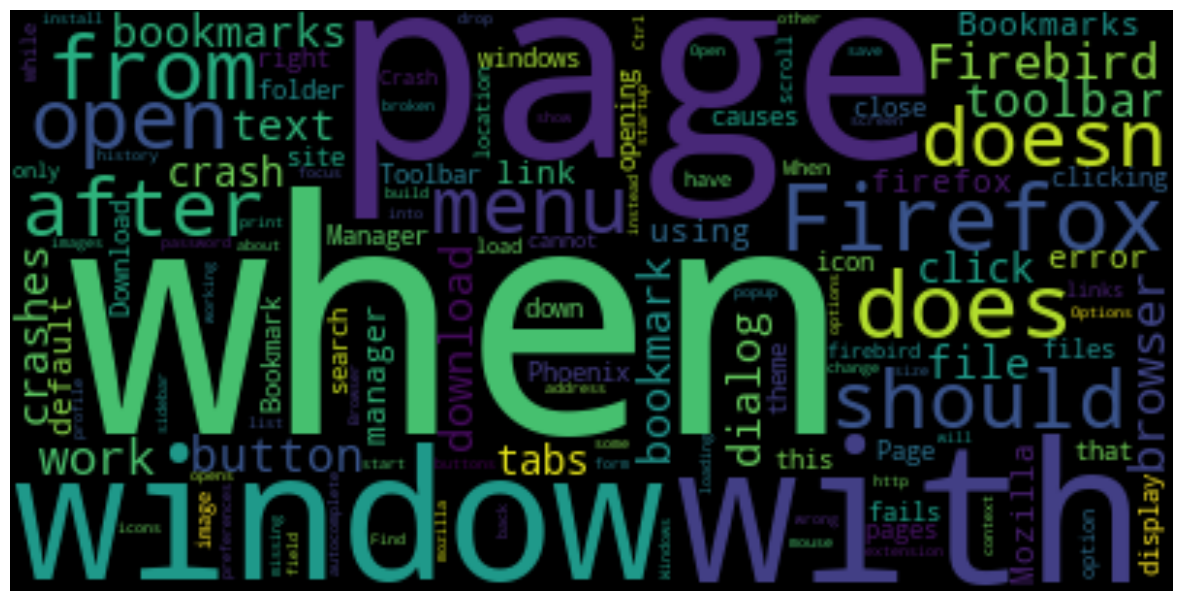

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wcloud = WordCloud().generate_from_frequencies(freq_large_words_dist)

plt.figure(figsize=(15, 10))
plt.imshow(wcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Build a Text Preprocessing Pipeline